In [13]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pylab import mpl
import seaborn as sns

In [14]:
# 禁用SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # 默认是'warn'

In [15]:
from matplotlib.font_manager import FontProperties

# 设置字体
font_path = '../SimHei.ttf'  # 替换为你的字体文件路径
font = FontProperties(fname=font_path, size=12)

In [16]:
filepath = 'products_info.xlsx'
df = pd.read_excel(filepath)
cols = ['制造商', '产品名称', '产品描述', '类别', '子类别', '成本', '单价']
df = df[cols].drop_duplicates()
print(df)

          制造商   产品名称 产品描述  类别  子类别          成本          单价
0     Brother  个人复印机   彩色  技术  复印机  497.321905  665.129762
1     Hewlett  个人复印机   彩色  技术  复印机  433.173485  673.141667
2          佳能  个人复印机   彩色  技术  复印机  461.494762  666.330357
3          夏普  个人复印机   彩色  技术  复印机  422.693972  558.507086
4          惠普  个人复印机   彩色  技术  复印机  445.372727  578.890152
...       ...    ...  ...  ..  ...         ...         ...
1948  Enermax     鼠标   耐用  技术   配件  170.091349  185.816984
1949  Memorex     鼠标   耐用  技术   配件  101.001247  130.952834
1950  SanDisk     鼠标   耐用  技术   配件  130.276190  177.258377
1951       罗技     鼠标   耐用  技术   配件   91.480392  136.840850
1952      贝尔金     鼠标   耐用  技术   配件  145.953992  190.309290

[1953 rows x 7 columns]


## 数据分布

### 不同类别商品单价分布

In [17]:
labels = ['办公用品', '家具', '技术']
colors = ['#8ECFC9', '#ff8e7a', '#8280d2']
color_dict = {'办公用品':'#8ECFC9', '家具':'#ff8e7a', '技术':'#8280d2'}

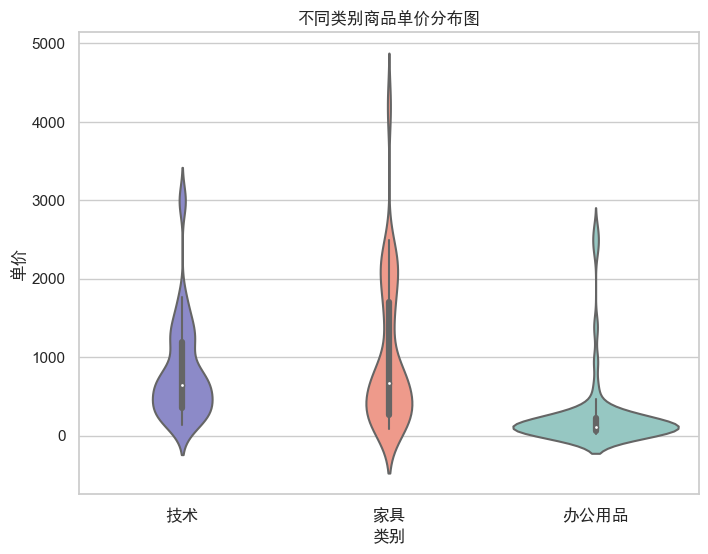

In [18]:
df2 = df[['类别', '成本', '单价']]
# 设置画布大小
plt.figure(figsize=(8, 6))

# 使用Seaborn绘制小提琴图
sns.violinplot(x='类别', y='单价', data=df2, palette=color_dict)

# 获取当前坐标轴
ax = plt.gca()
# 将 x 轴刻度标签设置为中文
ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font)
                   
# 添加标题和标签
plt.title('不同类别商品单价分布图', fontproperties=font)
plt.xlabel('类别', fontproperties=font)
plt.ylabel('单价', fontproperties=font)

# 显示图形
plt.show()

### 不同类别商品成本分布

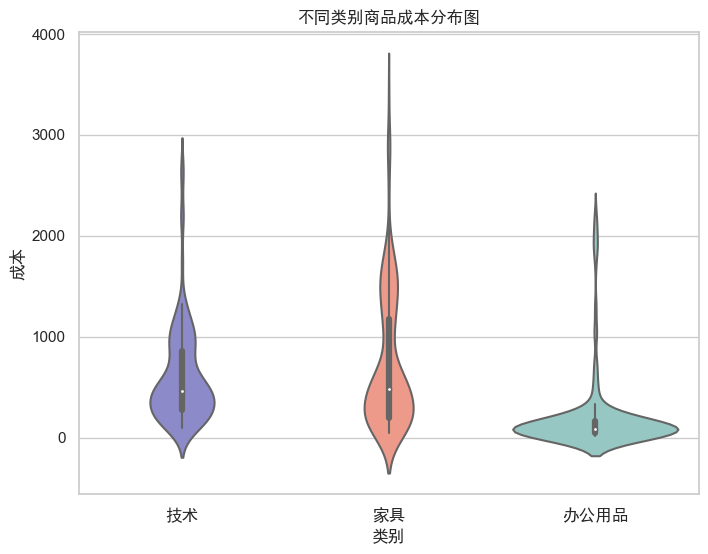

In [19]:
plt.figure(figsize=(8, 6))

sns.violinplot(x='类别', y='成本', data=df2, palette=color_dict)

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font)

plt.title('不同类别商品成本分布图', fontproperties=font)
plt.xlabel('类别', fontproperties=font)
plt.ylabel('成本', fontproperties=font)

plt.show()

### 不同子类别单价分布情况

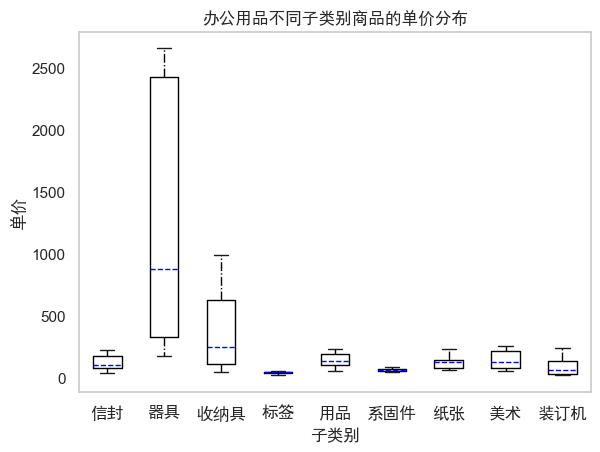

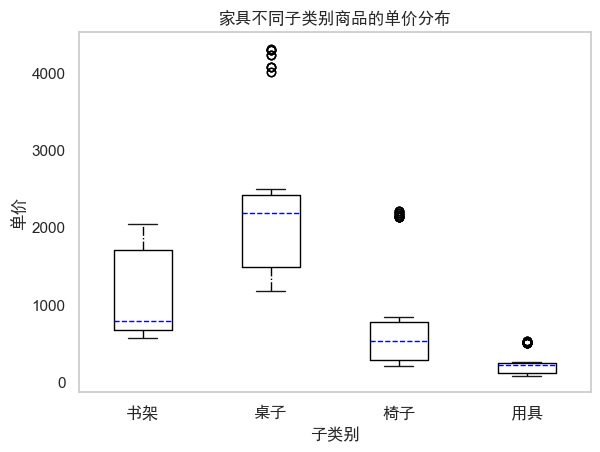

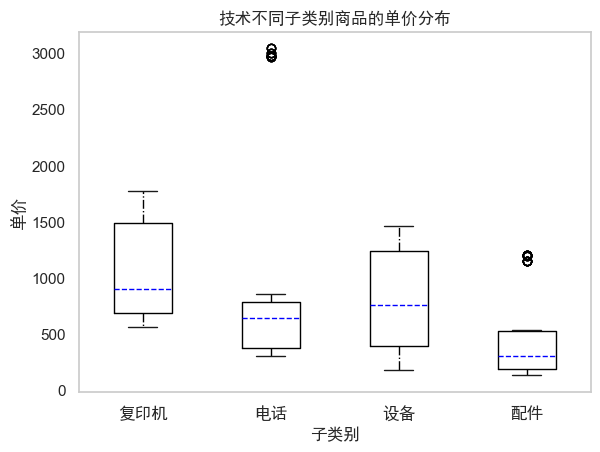

In [20]:
boxprops = dict(linestyle='-', linewidth=1)
medianprops = dict(linestyle='--', linewidth=1, color='blue')
whiskerprops = dict(linestyle='-.', linewidth=1, color='black')

for category in ['办公用品','家具','技术']:
    df[df['类别']==category].boxplot(by='子类别', column='单价', grid=False, boxprops=boxprops, medianprops=medianprops,
                            whiskerprops=whiskerprops)
    ax = plt.gca()
    ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font)
    plt.title(category+'不同子类别商品的单价分布', fontproperties=font)
    plt.suptitle('')  # 去掉默认的标题
    plt.xlabel('子类别', fontproperties=font)
    plt.ylabel('单价', fontproperties=font)
    plt.show()

### 不同子类别成本分布情况

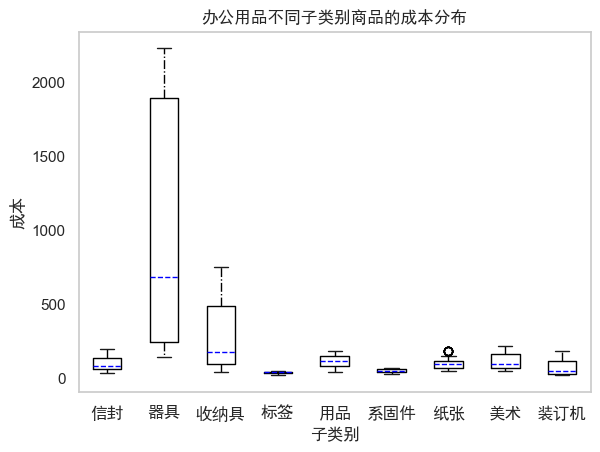

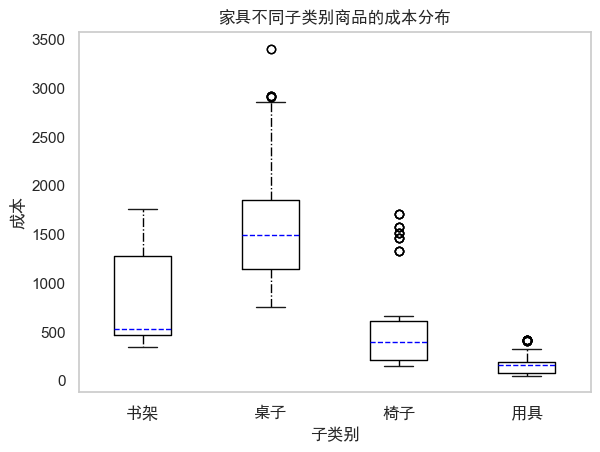

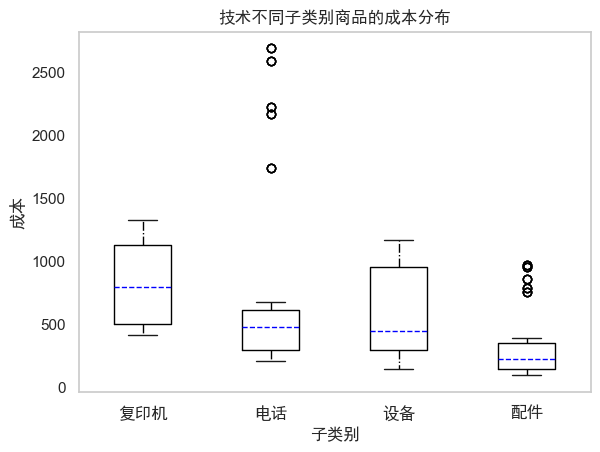

In [21]:
boxprops = dict(linestyle='-', linewidth=1)
medianprops = dict(linestyle='--', linewidth=1, color='blue')
whiskerprops = dict(linestyle='-.', linewidth=1, color='black')

for category in ['办公用品','家具','技术']:
    df[df['类别']==category].boxplot(by='子类别', column='成本', grid=False, boxprops=boxprops, medianprops=medianprops,
                            whiskerprops=whiskerprops)
    ax = plt.gca()
    ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font)
    plt.title(category+'不同子类别商品的成本分布', fontproperties=font)
    plt.suptitle('')  # 去掉默认的标题
    plt.xlabel('子类别', fontproperties=font)
    plt.ylabel('成本', fontproperties=font)
    plt.show()

### 成本和单价分布

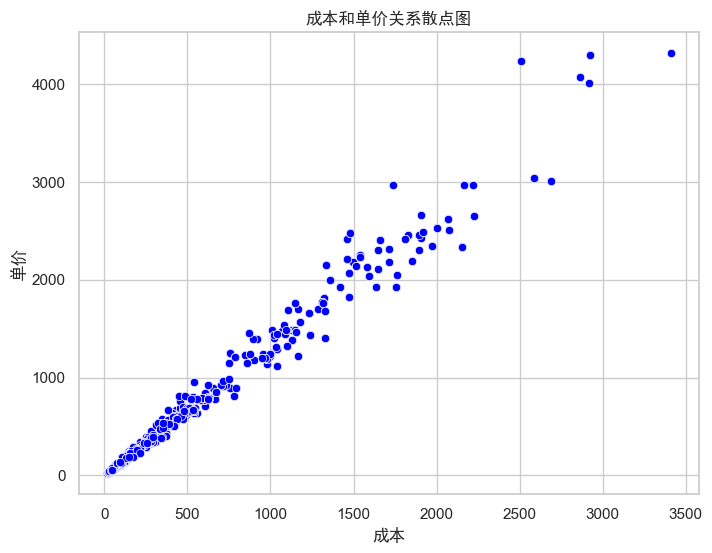

In [22]:
# 设置图形样式
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# 创建散点图
sns.scatterplot(x='成本', y='单价', data=df, marker='o', color='blue')

# 设置图形标题和轴标签
plt.title('成本和单价关系散点图', fontproperties=font)
plt.xlabel('成本', fontproperties=font)
plt.ylabel('单价', fontproperties=font)

# 显示图形
plt.show()

### 不同制造商的单价分布

In [23]:
df2 = df[['制造商', '产品名称', '单价', '子类别']][df['子类别']=='复印机'].drop_duplicates()
heatmap_data = df2.pivot_table(index='制造商', columns='产品名称', values='单价', aggfunc='mean')
print(heatmap_data)

产品名称          个人复印机       传真复印机          传真机          墨水          复印机  \
制造商                                                                     
Brother  665.129762  891.644841  1484.965781  687.381584  1222.842997   
Hewlett  673.141667  898.991688  1492.102941  694.258818  1229.268254   
佳能       666.330357  890.335365  1485.615278  687.447701  1222.055000   
夏普       558.507086  787.356343  1381.341060  578.865000  1115.305815   
惠普       578.890152  803.744597  1399.917130  599.782011  1134.735947   

产品名称           无线传真机  
制造商                   
Brother  1767.124150  
Hewlett  1772.555833  
佳能       1764.239317  
夏普       1660.939745  
惠普       1679.798902  


/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from current font.
  fig.canvas.draw()
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.draw()
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 22797 (\N{CJK UNIFIED IDEOGRAPH-590D}) missing from current font.
  fig.canvas.draw()
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 21360 (\N{CJK UNIFIED IDEOGRAPH-5370}) missing from current font.
  fig.canvas.draw()
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 26426 (\N{CJK UNIFIED IDEOGRAPH-673A}) missing from current font.
  fig.canvas.draw()
/User

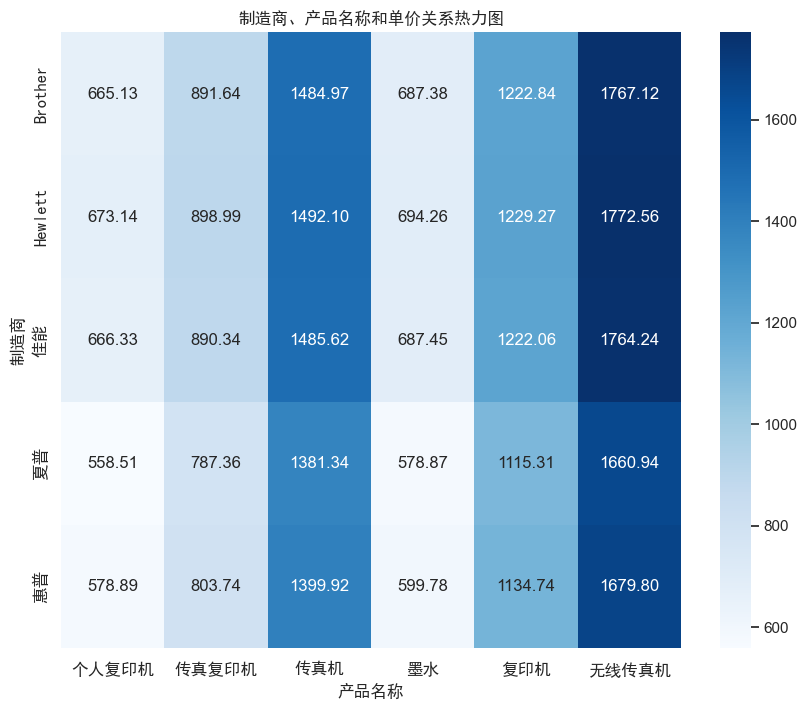

In [24]:
# 设置图形样式
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

# 创建热力图
sns.heatmap(heatmap_data,cmap='Blues', annot=True, fmt=".2f")
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font)
ax.set_yticklabels(ax.get_yticklabels(), fontproperties=font)

# 设置图形标题和轴标签
plt.title('制造商、产品名称和单价关系热力图', fontproperties=font)
plt.xlabel('产品名称', fontproperties=font)
plt.ylabel('制造商', fontproperties=font)

# 显示图形
plt.show()

## 相关系数计算

In [26]:
print(df)

          制造商   产品名称 产品描述  类别  子类别          成本          单价
0     Brother  个人复印机   彩色  技术  复印机  497.321905  665.129762
1     Hewlett  个人复印机   彩色  技术  复印机  433.173485  673.141667
2          佳能  个人复印机   彩色  技术  复印机  461.494762  666.330357
3          夏普  个人复印机   彩色  技术  复印机  422.693972  558.507086
4          惠普  个人复印机   彩色  技术  复印机  445.372727  578.890152
...       ...    ...  ...  ..  ...         ...         ...
1948  Enermax     鼠标   耐用  技术   配件  170.091349  185.816984
1949  Memorex     鼠标   耐用  技术   配件  101.001247  130.952834
1950  SanDisk     鼠标   耐用  技术   配件  130.276190  177.258377
1951       罗技     鼠标   耐用  技术   配件   91.480392  136.840850
1952      贝尔金     鼠标   耐用  技术   配件  145.953992  190.309290

[1953 rows x 7 columns]


In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['制造商'] = label_encoder.fit_transform(df['制造商'])
df['产品名称'] = label_encoder.fit_transform(df['产品名称'])
df['类别'] = label_encoder.fit_transform(df['类别'])
df['子类别'] = label_encoder.fit_transform(df['子类别'])
df['产品描述'] = label_encoder.fit_transform(df['产品描述'])

In [29]:
correlation_matrix = df.corr()

# 打印相关系数矩阵
print("相关系数矩阵:")
print(correlation_matrix)

相关系数矩阵:
           制造商      产品名称      产品描述        类别       子类别        成本        单价
制造商   1.000000 -0.018532 -0.136910  0.503294  0.165880  0.089779  0.086821
产品名称 -0.018532  1.000000 -0.107302 -0.048005  0.358671 -0.313046 -0.308943
产品描述 -0.136910 -0.107302  1.000000 -0.125135 -0.198759  0.172051  0.172496
类别    0.503294 -0.048005 -0.125135  1.000000  0.187010  0.357855  0.362041
子类别   0.165880  0.358671 -0.198759  0.187010  1.000000 -0.261516 -0.256381
成本    0.089779 -0.313046  0.172051  0.357855 -0.261516  1.000000  0.990504
单价    0.086821 -0.308943  0.172496  0.362041 -0.256381  0.990504  1.000000
